<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

**Import the required libraries**

In [2]:
# write your code # suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:


# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [4]:
df1 = pd.read_csv("Ind_Climate_RainPred.csv")
df1.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df1.shape

(10464, 12)

In [6]:
df1.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

In [7]:
df1['WillRainTomorrow?'] = df1['WillRainTomorrow?'].replace(to_replace=['Yes','No'],value=[0,1])   #yes=0 ,no=1

In [8]:
df1.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,1
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,1
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,0
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,1
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df1.describe(include=np.number)

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626,0.522171
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442,0.499532
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000,0.000000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000,0.000000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000,1.000000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000,1.000000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df1['WillRainTomorrow?'].value_counts()

1    5464
0    5000
Name: WillRainTomorrow?, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df1.isnull().sum()

Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
import seaborn as sns

In [13]:
X = df1.drop(columns=['WillRainTomorrow?'],axis=1)

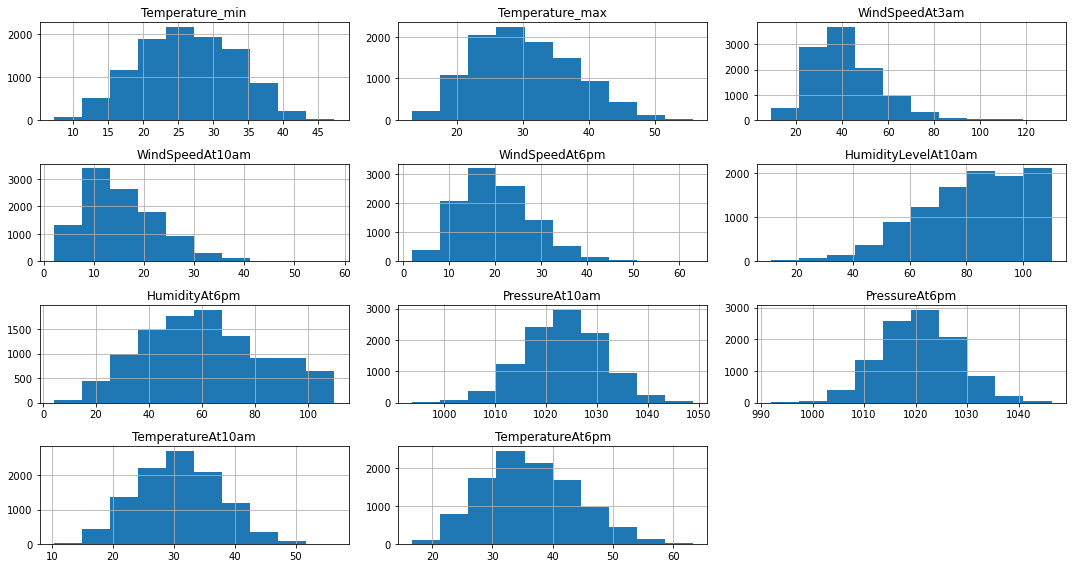

In [14]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using the 'drop()'
# 'axis=1' drops the specified column
X.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [15]:
X.skew()

Temperature_min        0.006720
Temperature_max        0.361414
WindSpeedAt3am         0.965806
WindSpeedAt10am        0.681830
WindSpeedAt6pm         0.625044
HumidityLevelAt10am   -0.636941
HumidityAt6pm          0.187420
PressureAt10am        -0.050507
PressureAt6pm          0.004457
TemperatureAt10am      0.075801
TemperatureAt6pm       0.312913
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# standardize all the independent variables 
# we drop the target variable using the 'drop()'
# 'axis=1' drops the specified column
# the 'fit_transform()' transforms the data by first computing the mean and sd and later scaling the data
df2 = StandardScaler().fit_transform(X)

# print the dimension of the standardized data
print(df2.shape)

(10464, 11)


In [19]:
df_scale = pd.DataFrame(df2)

<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(df2.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00009557  0.62986804  0.2774717   0.19188583  0.10114221 -0.25035675
  -0.05795163 -0.3635111  -0.34036162  0.71612149  0.54811355]
 [ 0.62986804  1.00009557  0.23626203 -0.01431146  0.07161277 -0.50728072
  -0.55772371 -0.24497184 -0.29854472  0.76966307  0.8658169 ]
 [ 0.2774717   0.23626203  1.00009557  0.42037333  0.57176138 -0.27611053
  -0.11724591 -0.47841125 -0.47563157  0.27207988  0.17209019]
 [ 0.19188583 -0.01431146  0.42037333  1.00009557  0.33458778 -0.31749763
  -0.00663469 -0.25165481 -0.18433562  0.14168084 -0.0391036 ]
 [ 0.10114221  0.07161277  0.57176138  0.33458778  1.00009557 -0.19684857
  -0.15049059 -0.33940416 -0.30875067  0.10542863  0.04909065]]


**Interpretation:** The covariance matrix is a square matrix of dimension 14x14. The diagonal entries correspond to the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.37827342 2.20537611 1.4028951  0.93909121 0.69185977 0.38762838
 0.34242384 0.24329175 0.11262274 0.13748201 0.160107  ] 

Eigenvectors: 
 
 [[ 0.33781785  0.03549082  0.35858565 -0.42444298  0.13644818  0.14320347
  -0.03924682  0.7102148   0.1131725  -0.11587593 -0.06766114]
 [ 0.40087506  0.28485778  0.10425574  0.03376955  0.1189962  -0.08118397
   0.15405941 -0.11028839 -0.82752819 -0.0604924   0.03216514]
 [ 0.26666777 -0.38120744 -0.1908883  -0.02705605  0.31592881 -0.78707893
  -0.12571969  0.05588588  0.05942134  0.04255307 -0.05314346]
 [ 0.14561644 -0.32320401 -0.33544556 -0.59156622 -0.38842204  0.06004674
   0.47855507 -0.14902074 -0.05799504 -0.04274979 -0.03114975]
 [ 0.17812567 -0.3671682  -0.34917199  0.09189247  0.61597616  0.55598391
  -0.01913024 -0.05338958 -0.03795733 -0.01323056  0.09857223]
 [-0.3093895  -0.14948994  0.44585592  0.03061406  0.38031984 -0.06731708
   0.58995926 -0.13531557  0.03534899 -0.07698165 -0.39936631]
 [-0.24976325 -0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[4.378273424761767, 2.2053761142853316, 1.4028950957281154, 0.9390912080234753, 0.6918597738714424, 0.38762837994450333, 0.34242383692492584, 0.2432917452762675, 0.16010699746005672, 0.13748200581003225, 0.11262274162621079]


#### 1) Kaiser criterion: This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.

Here the first three eigenvalues are greater than 1. Thus we can consider 3 principal components using kaiser criterion.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[39.79868192528702,
 20.046957780587494,
 12.752372972792669,
 8.536376936987093,
 6.2890332343071496,
 3.5235575995268094,
 3.112646481221764,
 2.2115317719849763,
 1.4553790610444237,
 1.2497169749012784,
 1.0237452613593303]

In [24]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 39.79868193,  59.84563971,  72.59801268,  81.13438962,
        87.42342285,  90.94698045,  94.05962693,  96.2711587 ,
        97.72653776,  98.97625474, 100.        ])

In [25]:
#4

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 9th, 10th and 11th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,2,3]]

# print the vectors
eigenvector

array([[ 0.33781785,  0.03549082,  0.35858565, -0.42444298],
       [ 0.40087506,  0.28485778,  0.10425574,  0.03376955],
       [ 0.26666777, -0.38120744, -0.1908883 , -0.02705605],
       [ 0.14561644, -0.32320401, -0.33544556, -0.59156622],
       [ 0.17812567, -0.3671682 , -0.34917199,  0.09189247],
       [-0.3093895 , -0.14948994,  0.44585592,  0.03061406],
       [-0.24976325, -0.30898812,  0.45624609, -0.36844966],
       [-0.27406409,  0.40143674, -0.25274467, -0.30171211],
       [-0.28205479,  0.36137641, -0.26688296, -0.38869691],
       [ 0.38706309,  0.15069408,  0.20620235, -0.26766507],
       [ 0.37221806,  0.31737997,  0.07134515,  0.09554306]])

In [27]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(df2.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4
0,-1.193577,0.344281,1.318532,1.383219
1,-0.417268,2.300435,-1.143463,-0.313206
2,-1.374390,0.522208,0.229444,-0.056650
3,-0.166105,-1.620767,-0.794714,0.358037
4,0.528825,2.208708,1.513146,0.370726


In [28]:
# check the shape of the transformed data
df_pca.shape

(10464, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 4, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df2)

In [30]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2,PC3,PC4
0,-1.193577,-0.344281,-1.318532,1.383219
1,-0.417268,-2.300435,1.143463,-0.313206
2,-1.374390,-0.522208,-0.229444,-0.056650
3,-0.166105,1.620767,0.794714,0.358037
4,0.528825,-2.208708,-1.513146,0.370726


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

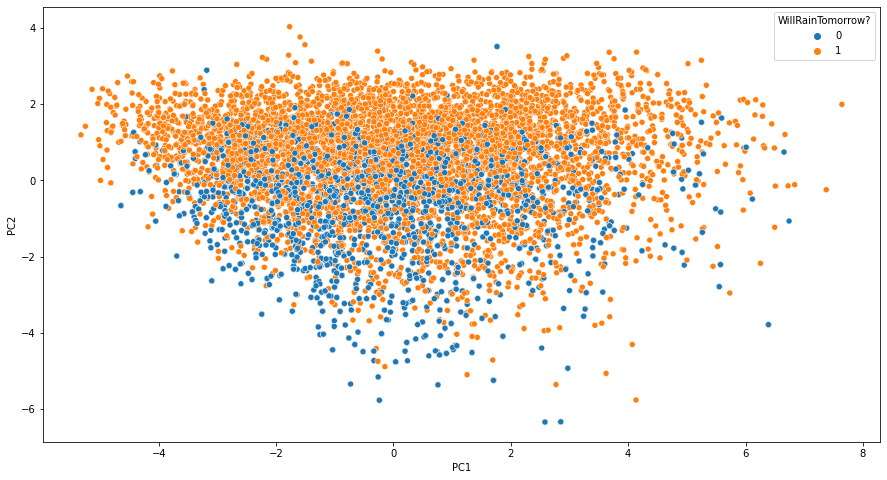

In [31]:
sns.scatterplot(x='PC1',y='PC2',data=df_pca,hue=df1['WillRainTomorrow?'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
df2.shape

(10464, 11)

In [33]:
# consider the independent variables
# convert the standardized array of the dataest to the dataframe
X = pd.DataFrame(df2)

# consider the target variable
y = df1['WillRainTomorrow?']

In [34]:
# split the original dataset into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
# pass the target variable to the parameter 'stratify', to obtain the balance of target labels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca1 = PCA(n_components = 3, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca1.fit_transform(df2)

In [36]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2,PC3
0,-1.193577,-0.344281,-1.318532
1,-0.417268,-2.300435,1.143463
2,-1.374390,-0.522208,-0.229444
3,-0.166105,1.620767,0.794714
4,0.528825,-2.208708,-1.513146


In [37]:
# consider the independent variables
# convert the standardized array of the dataest to the dataframe
X = pd.DataFrame(df_pca_sklearn)

# consider the target variable
y = df1['WillRainTomorrow?']

In [38]:
# split the original dataset into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
# pass the target variable to the parameter 'stratify', to obtain the balance of target labels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# define a function to build a decision tree model and calculate the accuracy on the test set
# pass the train and test sets as the 
def randomFOREST_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    df_random = RandomForestClassifier(random_state=10)
    
    # fit the decision tree model on the train set
    df_random.fit(X_train, y_train)
    
    # predict the target class for test set
    y_pred = df_random.predict(X_test)
    
    # print the accuracy score
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# consider the independent variables
# convert the standardized array of the dataest to the dataframe
X = pd.DataFrame(df2)

# consider the target variable
y = df1['WillRainTomorrow?']

In [42]:
# split the original dataset into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
# pass the target variable to the parameter 'stratify', to obtain the balance of target labels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [43]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the original data
randomFOREST_model_run(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.945859872611465
Wall time: 2.13 s


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 4, random_state = 10)

# fit the PCA on train set
# the 'transform()' computes the principal components 
# pass the train data to transform the train and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [45]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the original data
randomFOREST_model_run(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.9229299363057325
Wall time: 2.27 s


<a id="lda"> </a>
## 3. Linear Discriminant Analysis (LDA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Project the train and test sets (data without PCA transformation) onto the 1-dimensional vector that maximizes the separation between the classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# consider the target variable
df_target = df1['WillRainTomorrow?']

# check the unique classes in the target variable
df_target.unique()

array([1, 0], dtype=int64)

In [48]:
x=df_scale

In [49]:
X_std=pd.DataFrame(x,columns=x.columns)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_std, df_target, test_size = 0.3, random_state = 10, stratify = y)

In [51]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components=1)

# fit_transform() computes the linear discriminants on the given data 
# pass the standardized data of independent variables to the parameter 'X'
# pass the target variable to the parameter 'y'
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Run the random forest classifier on the LDA transformed data and find the model accuracy on the test set. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the original data
randomFOREST_model_run(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.945859872611465
Wall time: 2.32 s


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Which of the above methods is more efficient in reducing the dimension of the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## accuracy of pca
Accuracy on test set: 
0.9229299363057325
Wall time: 2.27 s
    
## accuracy of LDA   
Accuracy on test set: 
0.945859872611465
Wall time: 2.32 s   

In [53]:
#The accuracy of LDA is slightly better than PCA 